In [2]:
#Import necessary libraries
import numpy as np                                     
import pandas as pd                                
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.preprocessing import StandardScaler

import warnings           
warnings.filterwarnings('ignore')

In [3]:
#read dataset
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#show no. of duplicate rows
data.duplicated().sum()

0

In [10]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
data.shape

(768, 9)

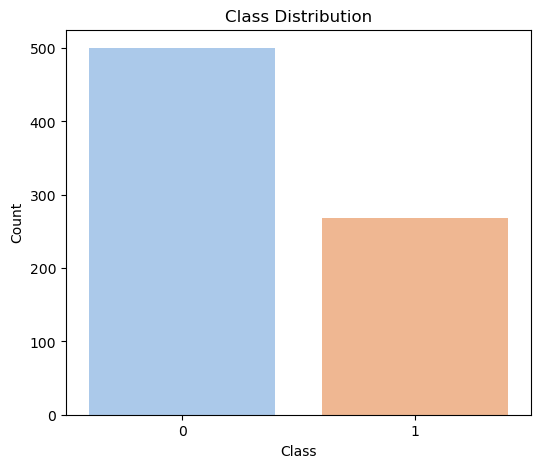

Outcome
0    500
1    268
Name: count, dtype: int64


In [14]:
target_column = data["Outcome"]
plt.figure(figsize=(6,5))
sns.countplot(x=target_column, palette="pastel")

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

class_counts = target_column.value_counts()
print(class_counts)

In [16]:
#split dataset
x = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
#scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

Outcome Predictions on test data:  [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


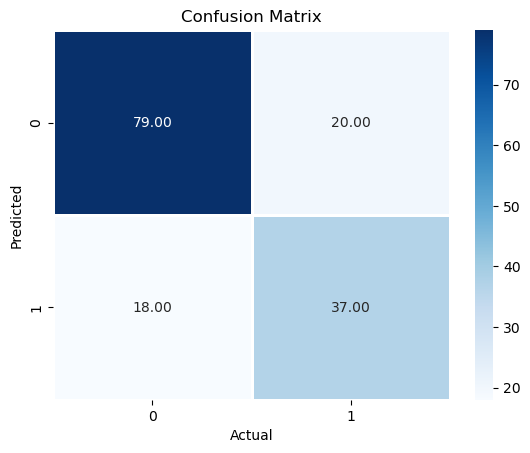

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-Score: 0.6607142857142857


In [22]:
#evaluate model
prediction = model.predict(x_test_scaled)
print ("Outcome Predictions on test data: ", prediction)

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Blues', fmt='0.2f', linewidth=0.9)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("F1-Score:", f1_score(y_test, prediction))

###### `Since dataset is imbalanced, the model didn’t perform. Imbalanced data can make it hard for the model to properly learn patterns from the minority class.`

#### `Using SMOTE (Synthetic Minority Over-sampling Technique)to create synthetic samples for the minority class and balance the dataset.`

In [26]:
#create synthetic samples
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42,  k_neighbors=10)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [28]:
y_resampled_series = pd.Series(y_resampled)
print("Class distribution")
print(y_resampled_series.value_counts())

Class distribution
Outcome
1    500
0    500
Name: count, dtype: int64


In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

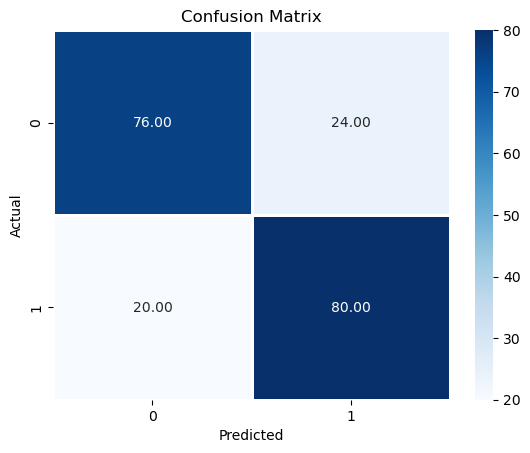

Accuracy: 0.78
Precision: 0.7692307692307693
Recall: 0.8
F1-Score: 0.7843137254901961


In [34]:
#evalutae model
y_pred = model.predict(x_test_scaled)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='0.2f', linewidth=0.9)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

In [38]:
#user inpput
pregnancy= float(input("Pregnancy: "))
glucose = float(input("Glucose Level: "))
blood = float(input("Blood Pressure: "))
skin = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
pedigree = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

#scale input
input_data = scaler.transform([[pregnancy, glucose, blood, skin, insulin, bmi, pedigree, age]])

predict = model.predict_proba(input_data)
result =""
predicted = predict[0][1]

threshold = 0.5
if predicted >= threshold:
    result = "Diabetic"
else:
    result = "Non-Diabetic"

print("\nResult:",result)
print("Likelihood of Diabetes: ", predicted)

Pregnancy:  1
Glucose Level:  189
Blood Pressure:  60
Skin Thickness:  23
Insulin:  846
BMI:  30.1
Diabetes Pedigree Function:  0.398
Age:  59



Result: Diabetic
Likelihood of Diabetes:  0.7988441592708575
